<a href="https://colab.research.google.com/github/Celine-Tang/Projet-traitement-de-donn-es/blob/master/Projet_traitement_de_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Les données que nous avons choisi concerne le taux de suicide de 1985 à 2016.
Nous avons choisi de mettre en valeur différents éléments de ce fichier :

- Les générations, les genres, l'âge (par tranche dâges et par genre), les années et les pays.


In [0]:
#importation des fichiers csv
import csv
Tauxdesuicide = open('tauxdesuicide.csv')

TDS = list(csv.DictReader(Tauxdesuicide, delimiter=","))
TDS =[dict(i) for i in TDS]

In [280]:
print (TDS[1])

{'country': 'Albania', 'year': '1987', 'sex': 'male', 'age': '35-54 years', 'suicides_no': '16', 'population': '308000', 'suicides/100k pop': '5.19', 'country-year': 'Albania1987', 'HDI for year': '', ' gdp_for_year ($) ': '2,156,624,900', 'gdp_per_capita ($)': '796', 'generation': 'Silent'}


On peut voir sur la deuxième ligne du fichier la variable 'suicides_no', c'est le nombre de suicides par pays, année, sexe et tranche d'âge. Par exemple, la première ligne est:

Albanie 1987 homme 35-54 ans 16. Avec suicides_no = 16. Ainsi, en Albanie (en 1987), 16 hommes, âgés de 35 à 54 ans, se sont suicidés.

Afin d'avoir le nombre total de suicide nous devons donc ajouter ce nombre pour chaque ligne que nous utilisons dans le fichier.

In [281]:
def total_suicide():
    nbds = 0
    for i in TDS :
        if i['sex'] == 'male' or 'female':
            nbds = nbds + int(i['suicides_no'])
    return nbds
total_suicide()

6748420

In [282]:
def dif_generation():
    generation = []
    a = ([i['generation'] for i in TDS])
    for i in a:
        if i not in generation :
            generation.append(i)
    return(generation)
dif_generation()

['Generation X',
 'Silent',
 'G.I. Generation',
 'Boomers',
 'Millenials',
 'Generation Z']

In [0]:
# Fonction qui prend en argument une des générations et renvoie un doublet [nom de la génération,le nombre de suicides]
def g(T,A) :
    E = 0
    for i in T :
        if i['generation'] == A :
            E = E + int(i['suicides_no'])
    doublet  = [A,E]
    return doublet

In [284]:
C = [g(TDS,'Generation X'),g(TDS,'Silent'),g(TDS,'G.I. Generation'),g(TDS,'Boomers'),g(TDS,'Millenials'),g(TDS,'Generation Z')]
print(C)

[['Generation X', 1532804], ['Silent', 1781744], ['G.I. Generation', 510009], ['Boomers', 2284498], ['Millenials', 623459], ['Generation Z', 15906]]


Text(0, 0.5, 'Nombres de suicides(en M)')

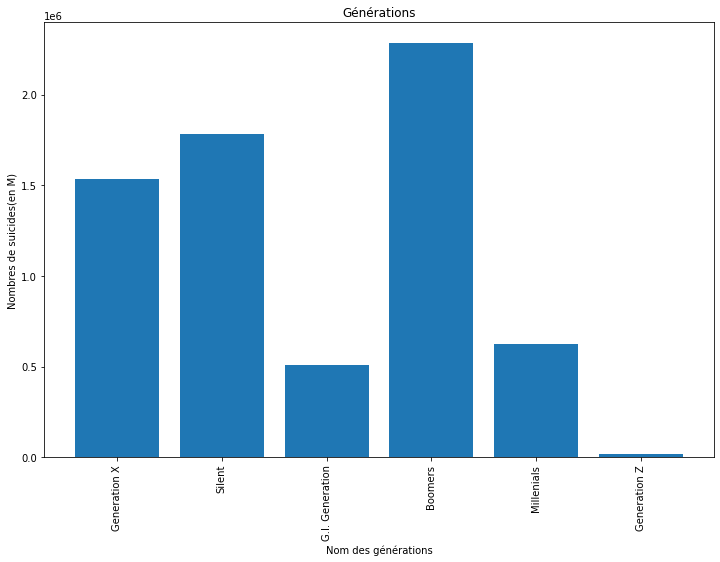

In [285]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
barWidth = 0.9
bars1 = [3, 3, 1]

L = C
r1,r2 = [],[]

for i in range(20) :
    if i<len(L) :
        r1.append(L[i][0])
        r2.append(float(L[i][1]))

plt.xticks(rotation=90)
plt.title('Générations')
plt.bar(r1, r2)
plt.xlabel('Nom des générations')
plt.ylabel('Nombres de suicides(en M)')

Nous avons ici les différentes valeurs de génération indiquant l'année de naissance.
En gros, la génération signifie:

GI Generation - né entre 1901 - 1927

Silencieux - né entre 1925 - 1942

Boomers - nés entre 1946 - 1964

Génération X - née entre 1960 - 1980

Génération Y - né entre 1980 - début 2000

Génération Z - née entre le milieu des années 1990 et les années 2000

On remarque un pic assez important (Boomers) qui n'a pas vraiment de sens, car la taille de la population d'une génération changera énormément d'année en année.

In [286]:
def homme():
    a=0
    for i in TDS:
        if i ['sex'] ==  'male':
            a = a+ int(i['suicides_no'])
    return a
homme()

5188910

In [287]:
def femme():
    b=0
    for i in TDS:
        if i ['sex'] ==  'female':
            b = b + int(i['suicides_no'])
    return b
femme()

1559510

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  if __name__ == '__main__':


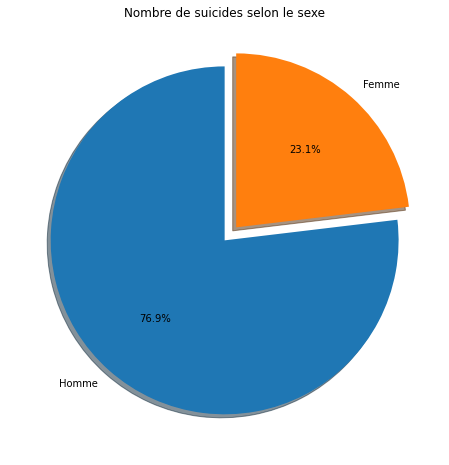

In [288]:
import matplotlib.pyplot as plt

labels = 'Homme', 'Femme'
sizes = [homme(), femme()]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis(aspect="equal")

plt.title('Nombre de suicides selon le sexe')

plt.show()

Les hommes sont beaucoup plus nombreux à se suicider que les femmes : ils représentent trois quarts de ce type de décès. Cette surmortalité masculine est constatée.

Sur 6 748 420 de personnes on compte donc 5189535 hommes et 1558885 femmes.

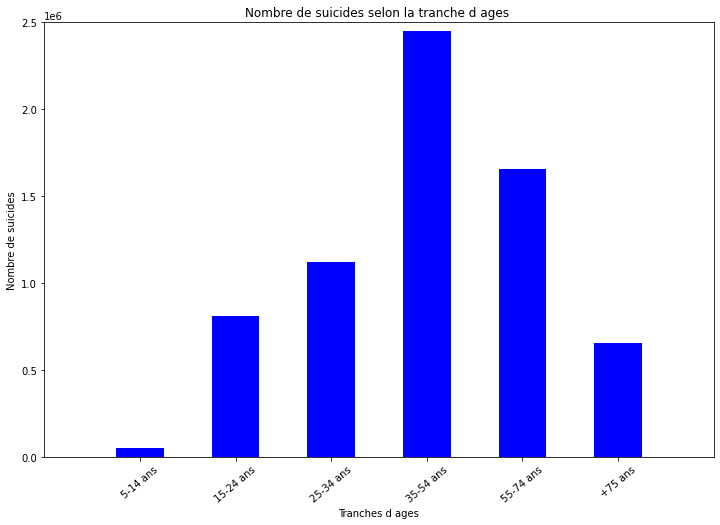

In [289]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import csv
fichier = open('tauxdesuicide.csv')
table = list(csv.DictReader(fichier))
TDS = [dict(i) for i in table]


def dizaine():
    a = 0
    for i in TDS : 
        if i['age'] == '5-14 years':
            a = a + int(i['suicides_no'])
    return a


def vingtaine():
    b = 0
    for i in TDS : 
        if i['age'] == '15-24 years':
            b = b + int(i['suicides_no'])
    return b


def trentaine():
    c = 0
    for i in TDS : 
        if i['age'] == '25-34 years':
            c = c + int(i['suicides_no'])
    return c


def cinquantaine():
    d = 0
    for i in TDS : 
        if i['age'] == '35-54 years':
            d = d + int(i['suicides_no'])
    return d


def soixante_dix():
    e = 0
    for i in TDS : 
        if i['age'] == '55-74 years':
            e = e + int(i['suicides_no'])
    return e


def octo():
    f = 0
    for i in TDS : 
        if i['age'] == '75+ years':
            f = f + int(i['suicides_no'])
    return f


fig = plt.figure()

x = [1,2,3,4,5,6]
height = [dizaine(), vingtaine(), trentaine(), cinquantaine(), soixante_dix(), octo()]
width = 0.5
BarName = ['5-14 ans','15-24 ans','25-34 ans','35-54 ans','55-74 ans','+75 ans']

plt.bar(x, height, width, color='blue' )

plt.xlim(0,7)
plt.ylim(0,2500000)

plt.xlabel('Tranches d ages')
plt.ylabel('Nombre de suicides')
plt.title('Nombre de suicides selon la tranche d ages ')

pylab.xticks(x, BarName, rotation=40)

plt.show()

Deux catégories d’âge présentent une surmortalité : les 35-54 ans et les 55-74 ans. 
On peut supposer que la population professionnelle est la plus à risque

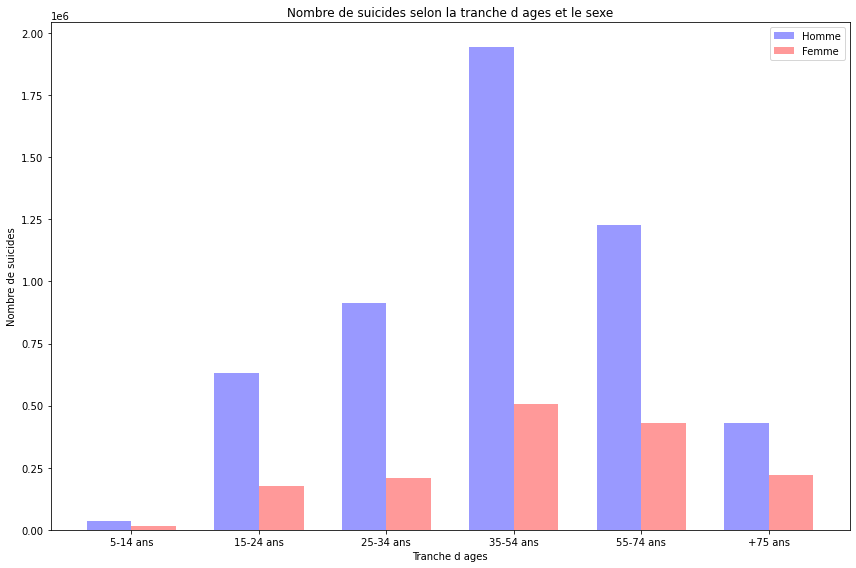

In [290]:
import numpy as np
import matplotlib.pyplot as plt
import csv

fichier = open('tauxdesuicide.csv')
table = list(csv.DictReader(fichier))
TDS = [dict(i) for i in table]


def femme_dizaine():
    a = 0
    for i in TDS :
        if i['sex'] == 'female' :
            if i['age'] == '5-14 years' :
                a = a + int(i['suicides_no'])
    return a


def homme_dizaine():
    b = 0
    for i in TDS :
        if i['sex'] == 'male' :
            if i['age'] == '5-14 years' :
                b = b + int(i['suicides_no'])
    return b


def femme_vingtaine():
    c = 0
    for i in TDS :
        if i['sex'] == 'female' :
            if i['age'] == '15-24 years' :
                c = c + int(i['suicides_no'])
    return c


def homme_vingtaine():
    d = 0
    for i in TDS :
        if i['sex'] == 'male' :
            if i['age'] == '15-24 years' :
                d = d + int(i['suicides_no'])
    return d


def femme_trentaine():
    e = 0
    for i in TDS :
        if i['sex'] == 'female' :
            if i['age'] == '25-34 years' :
                e = e + int(i['suicides_no'])
    return e


def homme_trentaine():
    f = 0
    for i in TDS :
        if i['sex'] == 'male' :
            if i['age'] == '25-34 years' :
                f = f + int(i['suicides_no'])
    return f


def femme_cinquantaine():
    g = 0
    for i in TDS :
        if i['sex'] == 'female' :
            if i['age'] == '35-54 years' :
                g = g + int(i['suicides_no'])
    return g


def homme_cinquantaine():
    h = 0
    for i in TDS :
        if i['sex'] == 'male' :
            if i['age'] == '35-54 years' :
                h = h + int(i['suicides_no'])
    return h


def femme_soixante_dix():
    j = 0
    for i in TDS :
        if i['sex'] == 'female' :
            if i['age'] == '55-74 years' :
                j = j + int(i['suicides_no'])
    return j


def homme_soixante_dix():
    k = 0
    for i in TDS :
        if i['sex'] == 'male' :
            if i['age'] == '55-74 years' :
                k = k + int(i['suicides_no'])
    return k


def femme_octo():
    l = 0
    for i in TDS :
        if i['sex'] == 'female' :
            if i['age'] == '75+ years' :
                l = l + int(i['suicides_no'])
    return l


def homme_octo():
    m = 0
    for i in TDS :
        if i['sex'] == 'male' :
            if i['age'] == '75+ years' :
                m = m + int(i['suicides_no'])
    return m


n_groups = 6

means_men = (homme_dizaine(), homme_vingtaine(), homme_trentaine(), homme_cinquantaine(), homme_soixante_dix(), homme_octo())
std_men = (2, 3, 4, 1, 2, 4)

means_women = (femme_dizaine(), femme_vingtaine(), femme_trentaine(), femme_cinquantaine(), femme_soixante_dix(), femme_octo())
std_women = (3, 5, 2, 3, 3, 2)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Homme')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config,
                 label='Femme')

plt.xlabel('Tranche d ages')
plt.ylabel('Nombre de suicides')
plt.title('Nombre de suicides selon la tranche d ages et le sexe')
plt.xticks(index + bar_width / 2, ('5-14 ans', '15-24 ans', '25-34 ans', '35-54 ans', '55-74 ans', '+75 ans'))
plt.legend()

plt.tight_layout()
plt.show()

Des différences notables apparaissent encore entre hommes et femmes.

In [0]:
def dif_annee():
    annee = []
    a = ([i['year'] for i in TDS])
    for i in a:
        if i not in annee :
            annee.append(i)
    return(annee)

In [0]:
def A(T,F) :
    E = 0
    for i in T :
        if i['year'] == F :
            E = E + int(i['suicides_no'])
    return E

In [0]:
def graphe_annee():
    C = dif_annee()[:]
    D = []
    i = 0
    F = []
    j = 0
    for i in range(31):
        if C[i] <= C[i+1]:
            F.append([C[i],A(TDS,dif_annee()[j])])
            j = j + 1
    F.append([C[-1],A(TDS,dif_annee()[-1])])
    return F

Text(0.5, 1.0, 'nombre de suicides selon les années')

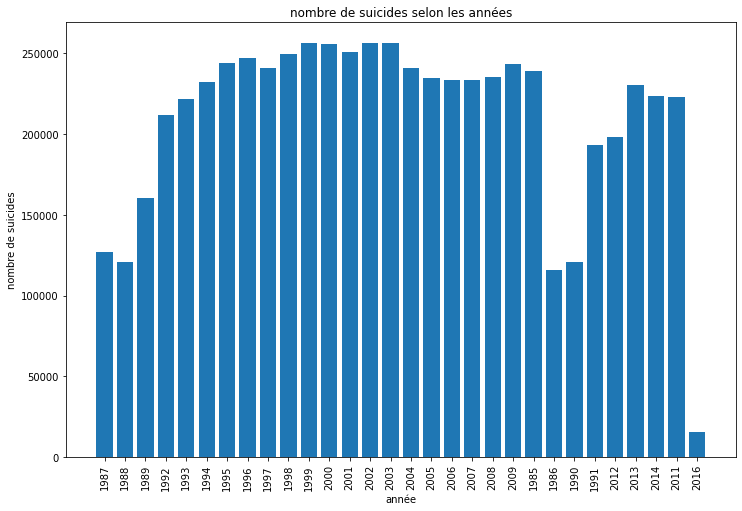

In [294]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
barWidth = 0.9
bars1 = [3, 3, 1]

L = graphe_annee()
r1,r2 = [],[]

for i in range(30) :
    if i<len(L) :
        r1.append(L[i][0])
        r2.append(float(L[i][1]))

plt.xticks(rotation=90)
plt.bar(r1, r2)
plt.xlabel('année')
plt.ylabel('nombre de suicides')
plt.title('nombre de suicides selon les années')

On peut voir une très forte baisse du taux de suicides en 2016
Mais cette différence est expliquée :
- Il y a un nombre différent de pays impliqués chaque année. Par exemple, le pays X est apparu en 2014 mais pourrait ne pas apparaître en 2016.

Le nombre de pays est le plus bas car l'année 2016 est la dernière année où les recherches ont été faites.

In [0]:
def dif_pays():
    P = []
    a = ([i['country'] for i in TDS])
    for i in a:
        if i not in P :
            P.append(i)
    return(P)

In [296]:
C = dif_pays()
print(C)

['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'San Marino

In [0]:
# Fonction qui prend en argument une liste et une des générations et renvoie le nombre de suicides
def h(T,F) :
    E = 0
    for i in T :
        if i['country'] == F :
            E = E + int(i['suicides_no'])
    return E

In [0]:
def graphe():
    C = dif_pays()[:]
    D = []
    i = 0
    F = []
    j = 0
    for i in range(100):
        if C[i] != C[i+1]:
            F.append([C[i],h(TDS,dif_pays()[j])])
            j = j + 1
    F.append([C[-1],h(TDS,dif_pays()[-1])])
    return F

Text(0, 0.5, 'Nombre de suicides')

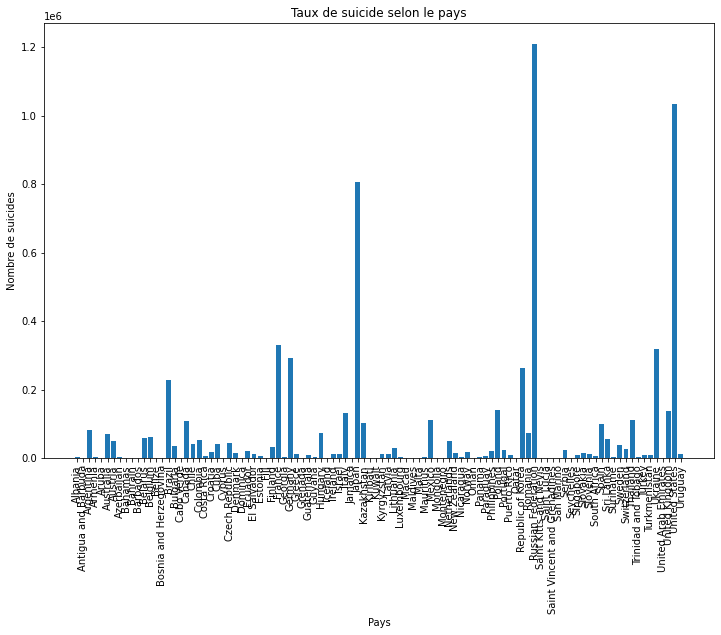

In [299]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
barWidth = 10
bars1 = [3, 3, 1]

L = graphe()
r1,r2 = [],[]

for i in range(100) :
    if i<len(L) :
        r1.append(L[i][0])
        r2.append(float(L[i][1]))

plt.xticks(rotation=90)
plt.title('Taux de suicide selon le pays')
plt.bar(r1, r2)
plt.xlabel('Pays')
plt.ylabel('Nombre de suicides')

On remarque beaucoup de suicides en Amérique, au sud notamment le Brésil, l’Argentine et le Chili et au nord avec les Etats Unis, et après on retrouve l’Europe avec la Russie, la France et la Germany et en Asie au Japon mais ausi la Corée.